In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
L_list=[0,16,32,64,128,256,512]
T_list=[0.88,0.885,0.89,0.891,0.892,0.89225,0.8925,0.89275,0.893,0.894,0.897,0.90]
T_list=np.array(T_list)
data=[]
for i in range(7):
    data.append(np.load("data_XY/XY_D40_L{}.npy".format(L_list[i])))

In [3]:
data[0].shape

(12, 16, 1600)

In [4]:
"""
L_list = 0 is a usual XY model, where L=64, for instance, is the π-twisted case for system size L=64.
"""

# L_max, T, L, n of xn(max: D*D)
print(len(data))

7


In [5]:
#L,T 
"""
In the twisted boundary conditions x_{V^s_{1/2}} is always the ground state.  
We define y2 = x_{V^c_{1/2}} - x_{V^s_{1/2}} for convenience.
the location of x_{V^c_{1/2}} depends on the system size so we need to be careful.
"""

# Let's first read out y2 from twisted boundary condition.
# π twist is realized at the corresponding system size/RG steps
y2_data=np.empty((6,12))
for i in range(6):
    if i<2:
        y2_data[i]=data[i+1][:,5+i*2,5]
    else:
        y2_data[i]=data[i+1][:,5+2*i,1]

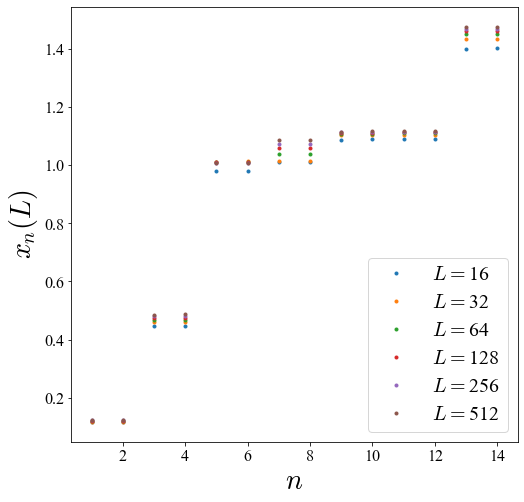

In [6]:
plt.figure(figsize=(8,8))
for i in range(5,16,2):
    plt.plot(range(1,15),data[0][11,i,1:15],".",label="$L = $"+str(2**(2+i//2)))
plt.xlabel("$n$",fontsize=28)
plt.ylabel("$x_n(L)$",fontsize=28)
plt.legend(fontsize=20)

In [7]:
#L,T
"""
Let's next read out y1 from PBC.(L=0)
"""


y1_data=np.empty((6,12))
for i in range(6):
    for j in range(12):
        y1_data[i,j]=(0.125-data[0][j,5+2*i,1])*16

y1_data2=np.empty((6,12))
for i in range(6):
    for j in range(12):
        y1_data2[i,j]=(0.5-data[0][j,5+2*i,3])*4
        
# https://journals.aps.org/prb/pdf/10.1103/PhysRevB.104.165132
yK_2nd=y1_data2+y2_data**2
yV_2nd=y2_data/(1-0.5*yK_2nd)

In [8]:
T_list[[1,2,3,4,8,9,10]]

array([0.885, 0.89 , 0.891, 0.892, 0.893, 0.894, 0.897])

/var/folders/8w/tjs26drj4_n9t1y5yv9b76dh0000gn/T/ipykernel_79430/898829700.py:25: RuntimeWarning: invalid value encountered in sqrt
  Y_list3.append(np.sqrt(X_list**2-sa_list3[i]))


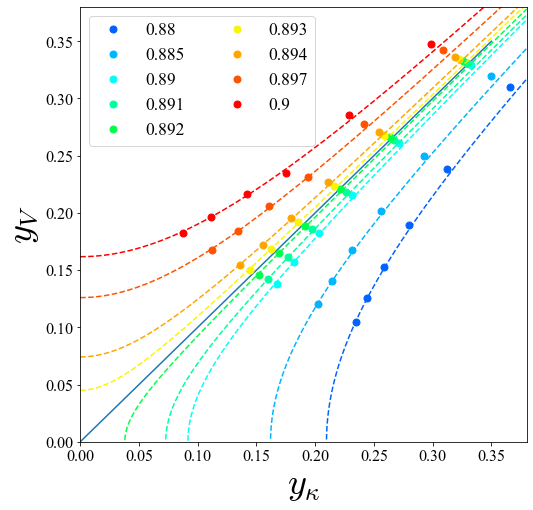

In [9]:
import matplotlib.cm as cm
trans_list=np.linspace(0,0.35,10)
plt.figure(figsize=(8,8))
num_list=[0,1,2,3,4,8,9,10,11]

plt.plot(trans_list,trans_list,"-")
for i in num_list:
    plt.plot(yK_2nd[:,i],yV_2nd[:,i],".",markersize=14,color=cm.hsv((11-i)/18.0),label=T_list[i])

plt.xlabel("$y_\kappa$",fontsize=36)
plt.legend(loc="upper left",fontsize=17.5,ncol=2)

plt.ylabel("$y_V$",fontsize=36)
plt.xlim(0.,0.38)
plt.ylim(0,0.38)
# plt.title("XY model")

sa_list3=[]
for i in range(12):
    sa_list3.append(yK_2nd[-2,i]**2-yV_2nd[-2,i]**2)
X_list=np.linspace(0,0.4,10000)

Y_list3=[]
for i in range(12):
    Y_list3.append(np.sqrt(X_list**2-sa_list3[i]))
for i in num_list:
    plt.plot(X_list,Y_list3[i],"--",markersize=16,color=cm.hsv((11-i)/18.0))

plt.savefig("RGflow_XY.png",bbox_inches='tight')